In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/home/nitesh/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
df = pd.read_csv("/home/nitesh/Desktop/customer-churn/telco_customer_churn.csv")
df[:10]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# Exploratory Data Analysis (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Using info() function we can see the number of non-null values and the data types of each column

In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Using describe() function we can observe the numerical column and analyse the data.

In [5]:
df.shape

(7043, 21)

we can see that we have 21 columns and 7043 rows

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.columns.to_list()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.isna().mean() * 100

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [10]:
# let's convert totalcharges datatype from object to int

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [11]:
df["TotalCharges"].isna().sum()

11

<Axes: >

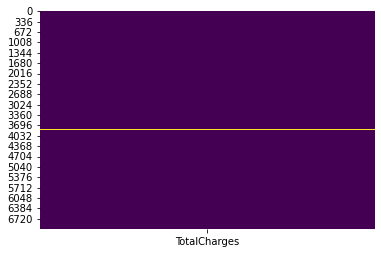

In [12]:
# we can visualize the null values using seaborn library
sns.heatmap(df[["TotalCharges"]].isnull(),cbar=False,cmap='viridis')

we can see there are missing values in the heatmap above.

In [13]:
df[np.isnan(df['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [14]:
# lets replace the missing values in TotalCharges with mean.

df['TotalCharges'] = df["TotalCharges"].fillna(df["TotalCharges"].mean())

In [15]:
df["TotalCharges"].isna().any()

False

As we can see, we have converted necessary column from categorical to numerical.
We also checked the missing values and impute using mean.

Now, lets check the unique value counts on categorical feature, 
so we can drop unneccessary column, perform feature engineering technique
like one-hot-encoding to train the model.

In [16]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [17]:
df["customerID"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: customerID
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.1+ KB


In [18]:
df["customerID"].value_counts()

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64

In [19]:
# Let's count duplicate values per column
for col in df.columns:
    total_duplicates = df[col].duplicated().sum()
    if total_duplicates > 0:
        print(f"{col}: {total_duplicates} duplicate values")


gender: 7041 duplicate values
SeniorCitizen: 7041 duplicate values
Partner: 7041 duplicate values
Dependents: 7041 duplicate values
tenure: 6970 duplicate values
PhoneService: 7041 duplicate values
MultipleLines: 7040 duplicate values
InternetService: 7040 duplicate values
OnlineSecurity: 7040 duplicate values
OnlineBackup: 7040 duplicate values
DeviceProtection: 7040 duplicate values
TechSupport: 7040 duplicate values
StreamingTV: 7040 duplicate values
StreamingMovies: 7040 duplicate values
Contract: 7040 duplicate values
PaperlessBilling: 7041 duplicate values
PaymentMethod: 7039 duplicate values
MonthlyCharges: 5458 duplicate values
TotalCharges: 512 duplicate values
Churn: 7041 duplicate values


Before dropping the customerID column, lets check the duplicate values first.

Lets check the duplicate values in the column first and then
we can move on to perform univariate analysis on each categorical column

In [20]:
df.duplicated().sum()

0

We don't need customerID column to train our model,
so we can drop this column for better model performance and generalization.

In [21]:
df = df.drop('customerID', axis=1)

In [22]:
df.columns.to_list()

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

we have successfully dropped the customerID column

In [23]:
df['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

<Axes: ylabel='count'>

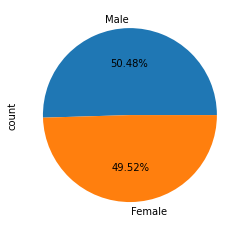

In [24]:
# we can even do some visualization using matplotlib 
df['gender'].value_counts().plot(kind='pie', autopct="%0.2f%%")

In [25]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

<Axes: xlabel='SeniorCitizen'>

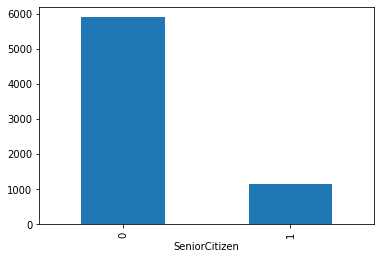

In [26]:
df['SeniorCitizen'].value_counts().plot(kind="bar")

we can easily visialize that we only have more than 1000 senior citizens in our dataset.

In [27]:
df['Partner'].value_counts()

Partner
No     3641
Yes    3402
Name: count, dtype: int64

In [28]:
df["Dependents"].value_counts()

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

In [29]:
df['PhoneService'].value_counts()

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

In [30]:
df['MultipleLines'].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [31]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [32]:
df['OnlineSecurity'].value_counts()

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

In [33]:
df['OnlineBackup'].value_counts()

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

In [34]:
df['DeviceProtection'].value_counts()

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

In [35]:
df['TechSupport'].value_counts()

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

In [36]:
df['StreamingTV'].value_counts()

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

In [37]:
df["StreamingMovies"].value_counts()

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

In [38]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [39]:
df['PaperlessBilling'].value_counts()

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

In [40]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [41]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [44]:
# Descriptive statistics for categorical data
df['Churn'].value_counts(normalize=True) * 100  # % distribution

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

In [63]:
df["SeniorCitizen"].dtypes

dtype('int64')

In [64]:
df["SeniorCitizen"].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

/home/nitesh/.local/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='tenure'>

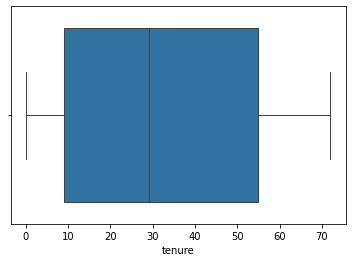

In [66]:
Q1 = df['tenure'].quantile(0.25)
Q3 = df['tenure'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['tenure'] < Q1 - 1.5 * IQR) | (df['tenure'] > Q3 + 1.5 * IQR)]
sns.boxplot(x='tenure', data=df)

lets create a function to make a reuseable code so we can easily analyse other numerical features with less lines of code.

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_box_with_stats(df, column):
    # Calculate quartiles and IQR
    Q1 = df[column].quantile(0.25)
    Q2 = df[column].median()
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Print stats
    print(f"Column: {column}")
    print(f"Q1 (25%): {Q1}")
    print(f"Median (Q2): {Q2}")
    print(f"Q3 (75%): {Q3}")
    print(f"IQR: {IQR}")
    print(f"Lower bound (outliers < this): {lower_bound}")
    print(f"Upper bound (outliers > this): {upper_bound}")
    
    # Plot boxplot
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column], color="skyblue")
    
    # Add lines for Q1, Median, Q3
    plt.axvline(Q1, color='red', linestyle='--', label=f"Q1: {Q1:.2f}")
    plt.axvline(Q2, color='green', linestyle='-', label=f"Median: {Q2:.2f}")
    plt.axvline(Q3, color='blue', linestyle='--', label=f"Q3: {Q3:.2f}")
    
    # Show legend
    plt.legend()
    plt.title(f"Boxplot with Q1, Median, Q3 for {column}")
    plt.show()


Column: tenure
Q1 (25%): 9.0
Median (Q2): 29.0
Q3 (75%): 55.0
IQR: 46.0
Lower bound (outliers < this): -60.0
Upper bound (outliers > this): 124.0


/home/nitesh/.local/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


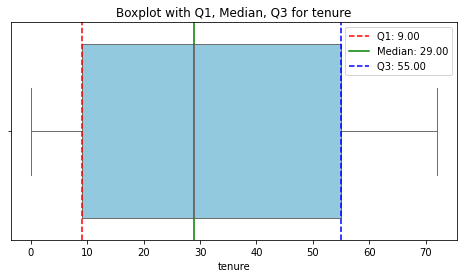

In [57]:
plot_box_with_stats(df, 'tenure')

Column: MonthlyCharges
Q1 (25%): 35.5
Median (Q2): 70.35
Q3 (75%): 89.85
IQR: 54.349999999999994
Lower bound (outliers < this): -46.02499999999999
Upper bound (outliers > this): 171.375


/home/nitesh/.local/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


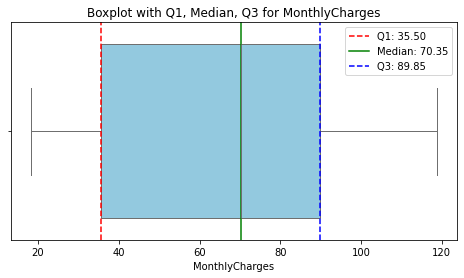

In [58]:
plot_box_with_stats(df, "MonthlyCharges")

<Axes: xlabel='SeniorCitizen', ylabel='count'>

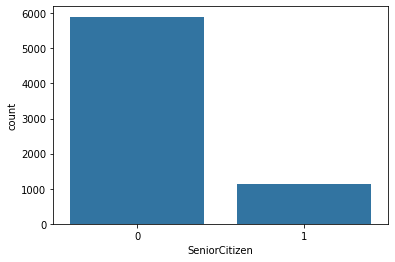

In [65]:
df['SeniorCitizen'].value_counts(normalize=True) * 100
sns.countplot(x='SeniorCitizen', data=df)


Hence, SeniorCitizen is a binary column so I can't use 
boxplot as boxplot is designed for continuos numerical data. By observiing the counterplot we can see we don't have any outliers.

As we can see we don't have any outliers in out dataset.

# Data preprocessing and Feature engineering

In [68]:
X = df.drop("Churn", axis=1)
y = df['Churn'].map({'Yes':1, 'No':0})   #converting target feature into 0 and 1.

In [69]:
cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

Let's display categorical and numerical features

In [92]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [71]:
num_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Constructing a pipeline usng logistic regression

Building a machine learning pipeline and performing one-hot-encoding on categorical features

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, classification_report
)
# 1. Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# 2. Preprocessing pipleines
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

# 3. Full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, solver='liblinear'))
])

# 4. Hyperparameters for GridSearchCV
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}

# 5. GridSearchCV with 5-folf CV
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# 6. Training the model using cross-validation
grid_search.fit(X_train, y_train)

# 7. Predict on test set
y_pred = grid_search.predict(X_test)
y_proba = grid_search.predict_proba(X_test)[:, 1]

# 8. Calculating the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters: {'classifier__C': 100, 'classifier__penalty': 'l2'}
Accuracy: 0.8006
Precision: 0.6467
Recall: 0.5481
AUC: 0.8406


# Lets try another classification algorithm. Try using Random Forest in my Churn Pipleine

In [91]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Hyperparameter grid for Random Forest
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__class_weight': [None, 'balanced']
}

# GridSearchCV with 5-fold CV
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Train model
grid_search.fit(X_train, y_train)

# Predictions
y_pred = grid_search.predict(X_test)
y_proba = grid_search.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)
cm = confusion_matrix(y_test, y_pred)

print("Best Hyperparameters:", grid_search.best_params_)
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"AUC:       {auc:.4f}")
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END classifier__class_weight=None, classifier__max_depth=None, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   2.0s
[CV] END classifier__class_weight=None, classifier__max_depth=10, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.9s
[CV] END classifier__class_weight=None, classifier__max_depth=20, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   1.1s
[CV] END classifier__class_weight=None, classifier__max_depth=20, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   1.0s
[CV] END classifier__class_weight=balanced, classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   2.1s
[CV] END classifier__class_weight=balanced, classifier__max_depth=10, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   1.9s
[CV] END classifier__class_weight=bala

[CV] END classifier__class_weight=None, classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   1.1s
[CV] END classifier__class_weight=None, classifier__max_depth=None, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   1.9s
[CV] END classifier__class_weight=None, classifier__max_depth=10, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   1.7s
[CV] END classifier__class_weight=None, classifier__max_depth=20, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   1.9s
[CV] END classifier__class_weight=balanced, classifier__max_depth=None, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   2.5s
[CV] END classifier__class_weight=balanced, classifier__max_depth=20, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   1.1s
[CV] END classifier__class_weight=balanced, classifier__max_depth=20, classifier__min_samples_spli

[CV] END classifier__class_weight=None, classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   2.1s
[CV] END classifier__class_weight=None, classifier__max_depth=10, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.9s
[CV] END classifier__class_weight=None, classifier__max_depth=20, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   1.1s
[CV] END classifier__class_weight=None, classifier__max_depth=20, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   1.0s
[CV] END classifier__class_weight=balanced, classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   1.1s
[CV] END classifier__class_weight=balanced, classifier__max_depth=None, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   2.1s
[CV] END classifier__class_weight=balanced, classifier__max_depth=10, classifier__min_samples_spli

[CV] END classifier__class_weight=None, classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   2.2s
[CV] END classifier__class_weight=None, classifier__max_depth=10, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   1.7s
[CV] END classifier__class_weight=None, classifier__max_depth=20, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   1.0s
[CV] END classifier__class_weight=balanced, classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   1.1s
[CV] END classifier__class_weight=balanced, classifier__max_depth=None, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   1.1s
[CV] END classifier__class_weight=balanced, classifier__max_depth=10, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   2.1s
[CV] END classifier__class_weight=balanced, classifier__max_depth=20, classifier__min_samples_

[CV] END classifier__class_weight=None, classifier__max_depth=None, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   1.0s
[CV] END classifier__class_weight=None, classifier__max_depth=10, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.9s
[CV] END classifier__class_weight=None, classifier__max_depth=10, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   1.7s
[CV] END classifier__class_weight=None, classifier__max_depth=20, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   2.1s
[CV] END classifier__class_weight=balanced, classifier__max_depth=None, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   1.0s
[CV] END classifier__class_weight=balanced, classifier__max_depth=10, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   1.0s
[CV] END classifier__class_weight=balanced, classifier__max_depth=10, classifier__min_samples_split=

[CV] END classifier__class_weight=None, classifier__max_depth=None, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   1.0s
[CV] END classifier__class_weight=None, classifier__max_depth=None, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   2.0s
[CV] END classifier__class_weight=None, classifier__max_depth=20, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   1.1s
[CV] END classifier__class_weight=None, classifier__max_depth=20, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   1.9s
[CV] END classifier__class_weight=balanced, classifier__max_depth=None, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   2.1s
[CV] END classifier__class_weight=balanced, classifier__max_depth=10, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   1.8s
[CV] END classifier__class_weight=balanced, classifier__max_depth=20, classifier__min_samples_spli

[CV] END classifier__class_weight=None, classifier__max_depth=None, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   1.0s
[CV] END classifier__class_weight=None, classifier__max_depth=10, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   1.0s
[CV] END classifier__class_weight=None, classifier__max_depth=10, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.9s
[CV] END classifier__class_weight=None, classifier__max_depth=20, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   1.1s
[CV] END classifier__class_weight=None, classifier__max_depth=20, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   2.0s
[CV] END classifier__class_weight=balanced, classifier__max_depth=None, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   2.3s
[CV] END classifier__class_weight=balanced, classifier__max_depth=10, classifier__min_samples_split=5, c

[CV] END classifier__class_weight=None, classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   1.1s
[CV] END classifier__class_weight=None, classifier__max_depth=None, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   2.0s
[CV] END classifier__class_weight=None, classifier__max_depth=20, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   2.1s
[CV] END classifier__class_weight=balanced, classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   2.2s
[CV] END classifier__class_weight=balanced, classifier__max_depth=10, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   2.0s
[CV] END classifier__class_weight=balanced, classifier__max_depth=20, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   2.1s
[CV] END classifier__class_weight=None, classifier__max_depth=None, classifier__min_samples_le

[CV] END classifier__class_weight=balanced, classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   1.0s
[CV] END classifier__class_weight=balanced, classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   1.9s
[CV] END classifier__class_weight=balanced, classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   1.7s
[CV] END classifier__class_weight=balanced, classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   1.6s
[CV] END classifier__class_weight=balanced, classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   2.2s
[CV] END classifier__class_weight=balanced, classifier__max_depth=10, classi

[CV] END classifier__class_weight=balanced, classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   1.0s
[CV] END classifier__class_weight=balanced, classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   2.0s
[CV] END classifier__class_weight=balanced, classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.9s
[CV] END classifier__class_weight=balanced, classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.9s
[CV] END classifier__class_weight=balanced, classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.9s
[CV] END classifier__class_weight=balanced, classifier__max_depth=20, classi

[CV] END classifier__class_weight=balanced, classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   1.0s
[CV] END classifier__class_weight=balanced, classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   1.0s
[CV] END classifier__class_weight=balanced, classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   1.0s
[CV] END classifier__class_weight=balanced, classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.9s
[CV] END classifier__class_weight=balanced, classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.9s
[CV] END classifier__class_weight=balanced, classifier__max_depth=10, clas

After applying logistic regression and random forest classfier to our churn pipeline, 
we can observe that accuracy and precision is better with random forrest classifier,
and recall is slightly better with the logistic regression as it could detect more actual churners.

# let's try XGBoost Algorithm to train the model

In [97]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 2.8 MB/s eta 0:00:00m eta 0:00:010:00:03
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.5/322.5 MB 2.8 MB/s eta 0:00:00m eta 0:00:010:00:03
Note: you may need to restart the kernel to use updated packages.


In [99]:
from xgboost import XGBClassifier

# 3. XGBoost Classifier inside a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        random_state=42,
        eval_metric='logloss',

    ))
])

# Hyperparameter grid
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.8, 1],
    'classifier__colsample_bytree': [0.8, 1]
}

# GridSearchCV with 5-fold CV
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit model
grid_search.fit(X_train, y_train)

# Predictions
y_pred = grid_search.predict(X_test)
y_proba = grid_search.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)
cm = confusion_matrix(y_test, y_pred)

print("Best Hyperparameters:", grid_search.best_params_)
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"AUC:       {auc:.4f}")
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=1; total time=   0.2s
[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=1; total time=   0.3s
[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.5s
[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.6s
[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.3s
[CV] END classifier__colsample_bytree=0.8, classifier__learning

[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=1; total time=   0.2s
[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=1; total time=   0.3s
[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.5s
[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=1; total time=   0.4s
[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.2s
[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100

Best Hyperparameters: {'classifier__colsample_bytree': 1, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 100, 'classifier__subsample': 1}
Accuracy:  0.7991
Precision: 0.6574
Recall:    0.5080
F1-Score:  0.5732
AUC:       0.8459

Confusion Matrix:
[[936  99]
 [184 190]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.51      0.57       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.2s
[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; tot

[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=1; total time=   0.3s
[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=1; total time=   0.3s
[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.4s
[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.7s
[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.3s
[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=2

[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.4s
[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=1; total time=   0.5s
[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.7s
[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=1; total time=   0.3s
[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.4s
[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=10

[CV] END classifier__colsample_bytree=1, classifier__learning_rate=0.2, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=1; total time=   0.4s
[CV] END classifier__colsample_bytree=1, classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=1; total time=   0.2s
[CV] END classifier__colsample_bytree=1, classifier__learning_rate=0.2, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=1; total time=   0.4s
[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.3s
[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=1; total time=   0.3s
[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=100, classif

[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=1; total time=   0.2s
[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=1; total time=   0.3s
[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.5s
[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=1; total time=   0.4s
[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.2s
[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100

Comparing the model with all three algorithms, we can see that XGBoost has got highest AUC which helps to rank and determine churners and non-churners,
whereas logistic regression has highest recall which helps in businesses where missing any churners is costly. Likewise, Random forest provides high accuracy, precisson and recall compared to other two algorithms.

Well, for churn-prediction model production, in order to detect churners and not to waste resources on false positives, Random Forest algorithm seems to be the best selection for this churn pipeline.